In [4]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np

In [5]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

In [10]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /Users/sejalgupta/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/sejalgupta/.keras-ocr/crnn_kurapan.h5


IMAGE NUMBER 1
1/1 [==============================] - 2s 2s/step


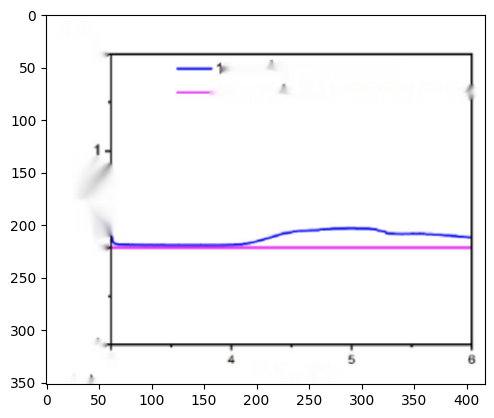

IMAGE NUMBER 2
1/1 [==============================] - 2s 2s/step


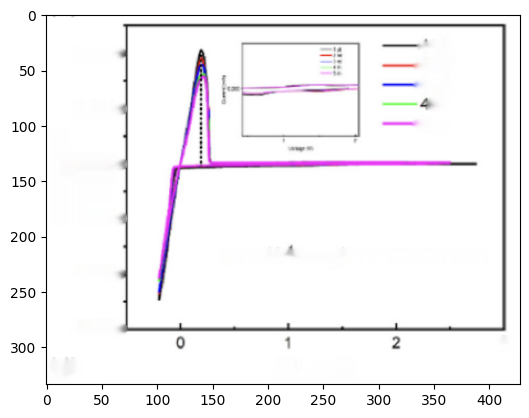

IMAGE NUMBER 3
1/1 [==============================] - 2s 2s/step


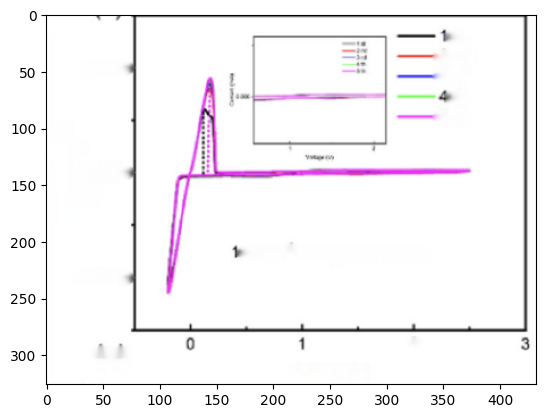

IMAGE NUMBER 4
2/2 [==============================] - 2s 172ms/step


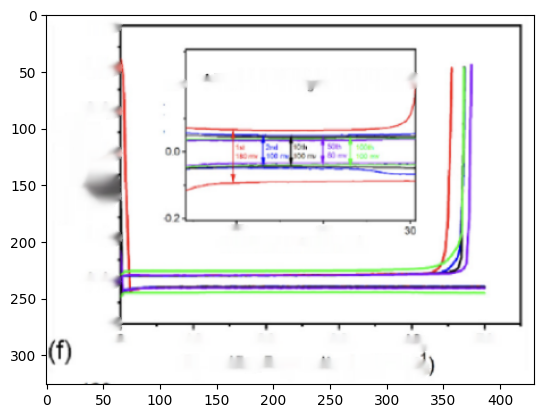

IMAGE NUMBER 5
1/1 [==============================] - 2s 2s/step


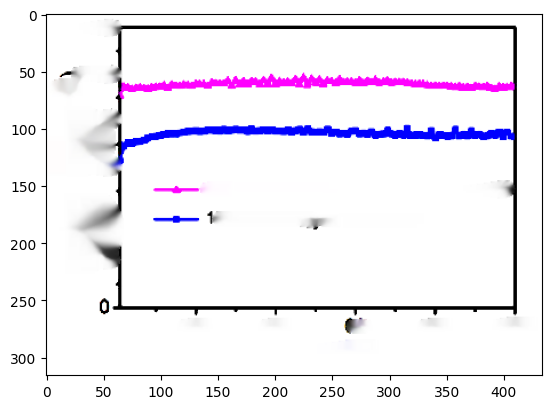

IMAGE NUMBER 6
2/2 [==============================] - 2s 163ms/step


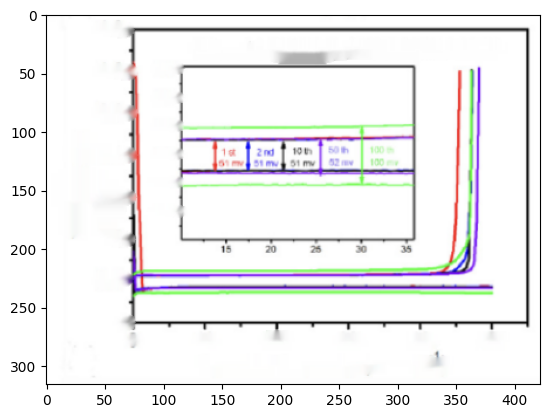

IMAGE NUMBER 7
2/2 [==============================] - 2s 282ms/step


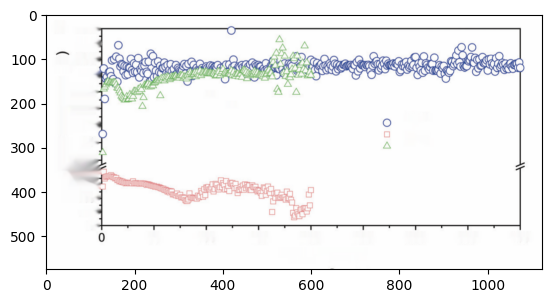

IMAGE NUMBER 8
1/1 [==============================] - 2s 2s/step


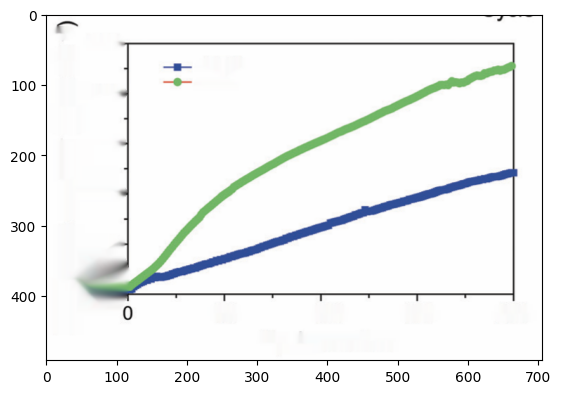

IMAGE NUMBER 9
2/2 [==============================] - 3s 1s/step


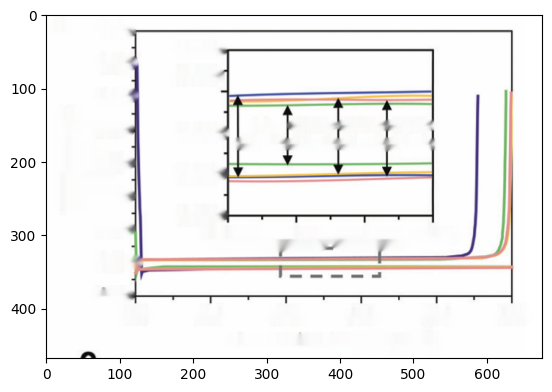

IMAGE NUMBER 10
1/1 [==============================] - 7s 7s/step


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [13]:
for image_num in range(1, 29):
    print(f'IMAGE NUMBER {image_num}')
    plt.figure()
    img_path = '../plot_images/'+str(image_num)+'.png'
    img = inpaint_text(img_path, pipeline)
    plt.imshow(img)
    plt.show()  # This will display the current figure